In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
import os
from joblib import dump, load


data = pd.read_csv('test.csv')

In [2]:
X = data[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
          'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=10)
clusters = agglo.fit_predict(X_scaled)

In [4]:
len(data['ram'].unique())

872

In [5]:
len(data['battery_power'].unique())

721

In [6]:
data['cluster'] = clusters

print(data['cluster'].value_counts())

cluster
1    147
2    138
9    111
5    106
0     99
8     95
4     94
6     75
7     72
3     63
Name: count, dtype: int64


In [7]:
data['cluster'] = clusters

output_dir = 'cluster_csv_hierarchical'
os.makedirs(output_dir, exist_ok=True)

for cluster_label in range(max(clusters) + 1):
    cluster_data = data[data['cluster'] == cluster_label]
    cluster_filename = os.path.join(output_dir, f'cluster_{cluster_label}.csv')
    cluster_data.to_csv(cluster_filename, index=False)

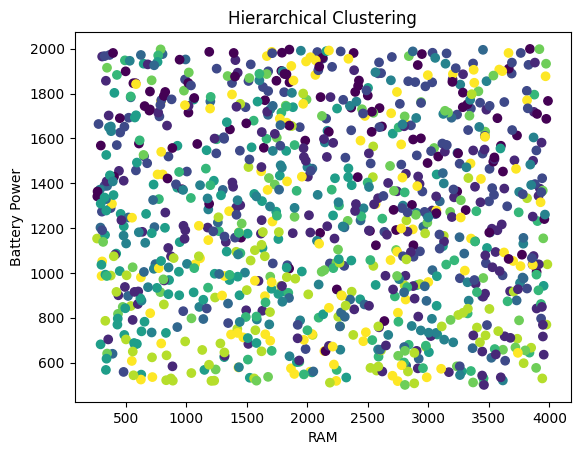

In [8]:
plt.scatter(data['ram'], data['battery_power'], c=clusters, cmap='viridis')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.title('Hierarchical Clustering')
plt.show()

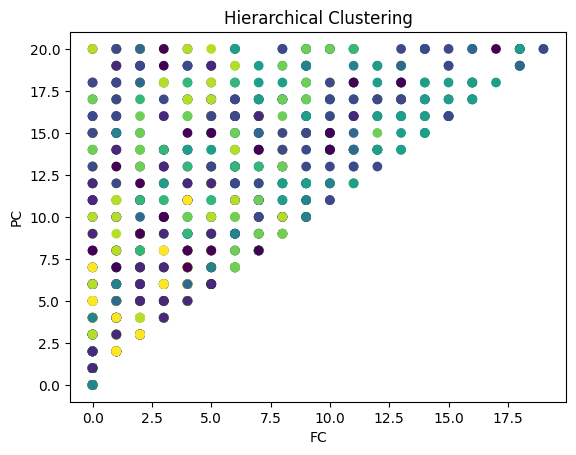

In [9]:
plt.scatter(data['fc'], data['pc'], c=clusters, cmap='viridis')
plt.xlabel('FC')
plt.ylabel('PC')
plt.title('Hierarchical Clustering')
plt.show()